In [1]:
from tensorflow.keras.datasets import mnist 
import numpy as np

(train_images, train_labels), _ = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))

train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
 [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
 [train_images, np.zeros((len(train_images), 784))], axis=1)

In [4]:
train_images_with_noise_channels.shape

(60000, 1568)

In [12]:
from tensorflow import keras 
from tensorflow.keras import layers
 
def get_model():
 model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
 ])
 model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])
 return model
model = get_model()
history_noise = model.fit(
 train_images_with_noise_channels, train_labels,
 epochs=10,
 batch_size=128,
 validation_split=0.2)
model = get_model()
history_zeros = model.fit(
 train_images_with_zeros_channels, train_labels,
 epochs=10,
 batch_size=128,
 validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 10s 25ms/step - loss: 0.6012 - accuracy: 0.8141 - val_loss: 0.2566 - val_accuracy: 0.9252
Epoch 2/10
375/375 [==============================] - 9s 23ms/step - loss: 0.2566 - accuracy: 0.9197 - val_loss: 0.2171 - val_accuracy: 0.9347
Epoch 3/10
375/375 [==============================] - 8s 22ms/step - loss: 0.1676 - accuracy: 0.9475 - val_loss: 0.1996 - val_accuracy: 0.9354
Epoch 4/10
375/375 [==============================] - 8s 22ms/step - loss: 0.1215 - accuracy: 0.9627 - val_loss: 0.1422 - val_accuracy: 0.9604
Epoch 5/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0889 - accuracy: 0.9727 - val_loss: 0.2362 - val_accuracy: 0.9278
Epoch 6/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0676 - accuracy: 0.9793 - val_loss: 0.1379 - val_accuracy: 0.9603
Epoch 7/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0492 - accuracy: 0.9843 - val_loss: 0.1302 - val_accuracy: 0.964

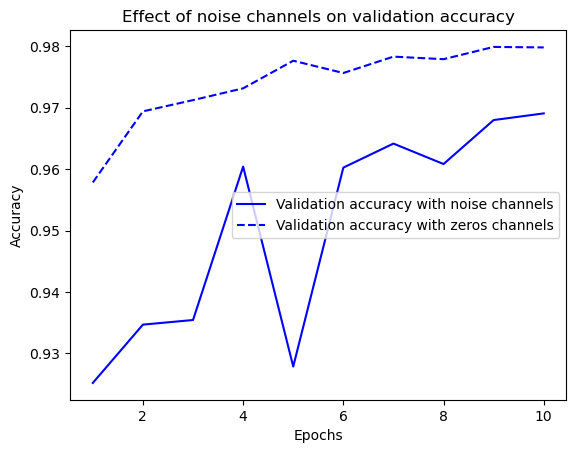

In [13]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
 label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
 label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [14]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])
model.fit(train_images, train_labels,
 epochs=10,
 batch_size=128,
 validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 694.1819 - accuracy: 0.2650 - val_loss: 2.4542 - val_accuracy: 0.1844
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 3.2323 - accuracy: 0.1833 - val_loss: 2.2624 - val_accuracy: 0.1784
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 2.5542 - accuracy: 0.1840 - val_loss: 2.3080 - val_accuracy: 0.1667
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 2.4034 - accuracy: 0.1680 - val_loss: 2.4002 - val_accuracy: 0.1475
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 2.3485 - accuracy: 0.1656 - val_loss: 2.2433 - val_accuracy: 0.2106
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 2.3625 - accuracy: 0.1729 - val_loss: 2.3918 - val_accuracy: 0.1521
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 2.3247 - accuracy: 0.1742 - val_loss: 2.2272 - val_accuracy: 0.187

In [15]:
model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])
model.fit(train_images, train_labels,
 epochs=10,
 batch_size=128,
 validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 12ms/step - loss: 0.3663 - accuracy: 0.9110 - val_loss: 0.1373 - val_accuracy: 0.9611
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1266 - accuracy: 0.9648 - val_loss: 0.1372 - val_accuracy: 0.9655
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.1009 - accuracy: 0.9732 - val_loss: 0.1371 - val_accuracy: 0.9699
Epoch 4/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0836 - accuracy: 0.9792 - val_loss: 0.1596 - val_accuracy: 0.9683
Epoch 5/10
375/375 [==============================] - 4s 12ms/step - loss: 0.0723 - accuracy: 0.9825 - val_loss: 0.1685 - val_accuracy: 0.9702
Epoch 6/10
375/375 [==============================] - 5s 12ms/step - loss: 0.0595 - accuracy: 0.9852 - val_loss: 0.1818 - val_accuracy: 0.9689
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0563 - accuracy: 0.9872 - val_loss: 0.2138 - val_accuracy: 0.9722
